1.Cài đặt thư viện.

In [ ]:
%pip install imageio
%pip install scipy
%pip install scikit-image

2.1 Nạp ảnh sử dụng thư viện

In [ ]:
from PIL import Image
import numpy as np
img = Image.open('bird.png')
img.show()

2.2 Nạp ảnh sử dụng lệnh thư viện

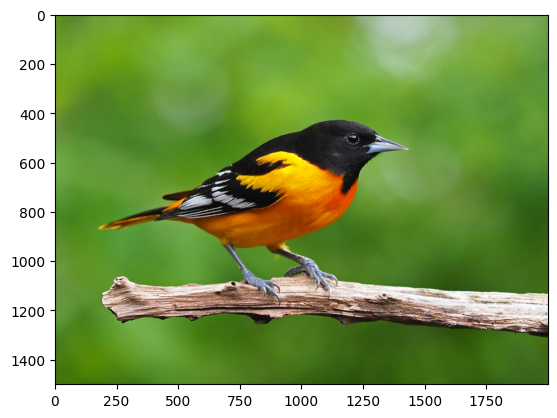

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
plt.imshow(data)
plt.show()


2.3 Độ phân giải ảnh

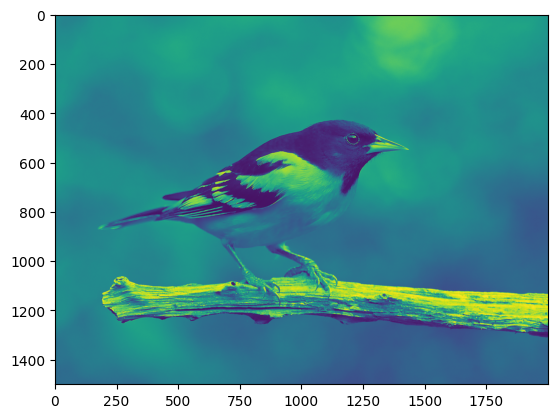

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='L')
plt.imshow(data)
plt.show()

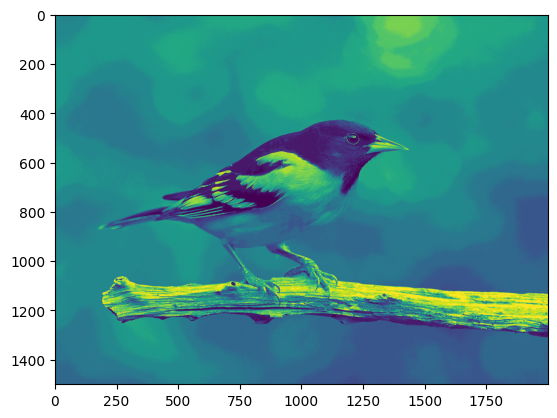

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='L').astype(np.uint8)
cl = data & 0xF0
iio.imsave('birdf0.png', cl)
tmp = iio.imread('birdf0.png')
plt.imshow(tmp)
plt.show()

2.4 Màu sắc với hệ GRB

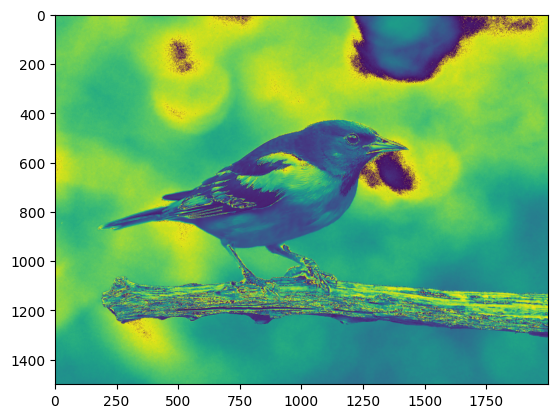

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow(bdata)
plt.show()

2.5 Màu sắc với hệ HSV

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

a = colorsys.rgb_to_hsv(255, 0, 0)
print(a)
b = colorsys.rgb_to_hsv(1, 0, 0)
print(b)
c = colorsys.rgb_to_hsv(0, 255, 0)
print(c)
d = colorsys.hsv_to_rgb(1, 1, 255)
print(d)

(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(255, 0.0, 0.0)


2.6 Ứng dụng chuyển đổi hệ màu

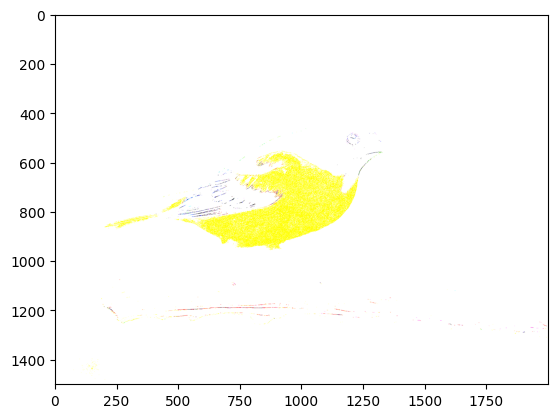

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])
h = h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv2rgb(h, s, v)
rgb2 = np.array(rgb2).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show()

In [ ]:
2.7 Lọc ảnh

[[119 119 119 ... 132 131 131]
 [119 119 119 ... 131 131 131]
 [120 120 119 ... 132 132 131]
 ...
 [ 89  89  89 ...  80  80  80]
 [ 89  89  89 ...  80  80  80]
 [ 90  89  89 ...  80  80  80]]


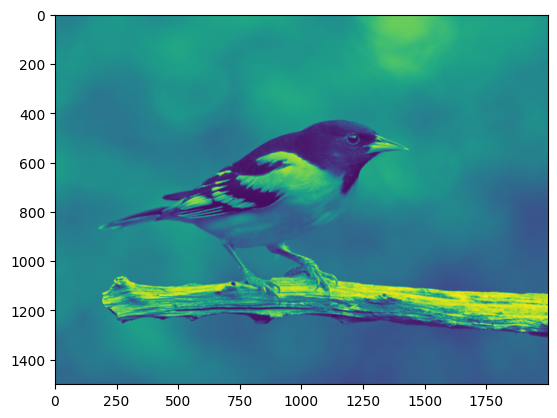

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode ='L')

# initializing the filter of size 5 by 5
# the filter is divided by 25 for normalization
k = np.ones((5,5))/25

# performing convolution
b = sn.convolve(a, k).astype(np.uint8)
iio.imsave('bird_mean_filter.png', b)
# b is converted from an ndarray to an image
print(b)
plt.imshow(b)
plt.show()


[[119 119 119 ... 132 132 132]
 [119 119 119 ... 132 132 132]
 [119 119 119 ... 132 132 132]
 ...
 [ 89  88  88 ...  81  81  81]
 [ 89  88  88 ...  81  81  81]
 [ 89  88  89 ...  81  81  81]]


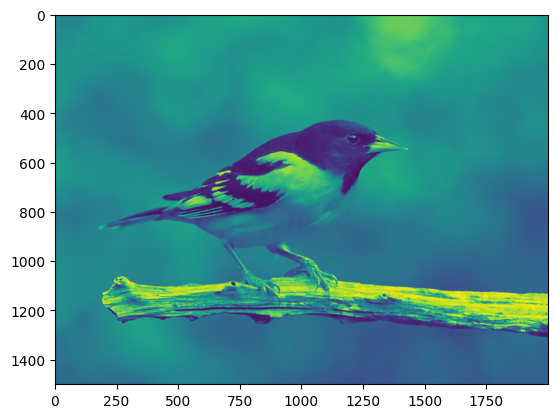

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='L').astype(np.uint8)

# performing median filter
## size = 5: convolution
## footprint: a boolean array of the same dimension of image.
## The pixels in the input image corresponding to the points to the
## footprint with true values are considered for filtering
## mode: padding (constant, reflect, nearest)
b = sn.median_filter(a, size=5, footprint=None, output=None,
                     mode='reflect', cval=0.0, origin=0)
iio.imsave('bird_median_filter.png', b)
# b is converted from an ndarray to an image
print(b)
plt.imshow(b)
plt.show()


Lọc ảnh với max filter

[[122 122 122 ... 139 139 139]
 [129 129 129 ... 139 139 139]
 [129 129 129 ... 139 139 139]
 ...
 [ 97  97  97 ...  84  84  84]
 [ 97  97  97 ...  84  84  84]
 [ 97  97  97 ...  84  84  84]]


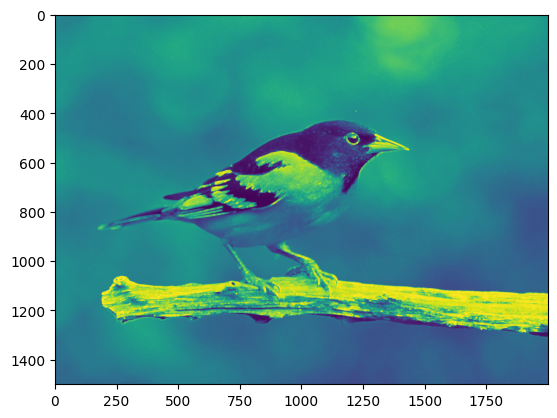

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='L').astype(np.uint8)

# performing maximum filter
## size = 5: convolution
## footprint: a boolean array of the same dimension of image.
## The pixels in the input image corresponding to the points to the
## footprint with true values are considered for filtering
## mode: padding (constant, reflect, nearest)
b = sn.maximum_filter(a, size=5, footprint=None, output=None,
                      mode='reflect', cval=0.0, origin=0)
iio.imsave('bird_max_filter.png', b)
# b is converted from an ndarray to an image
print(b)
plt.imshow(b)
plt.show()


Lọc ảnh với Min Filter

[[118 118 117 ... 127 127 127]
 [114 114 114 ... 127 127 127]
 [114 114 114 ... 127 127 127]
 ...
 [ 85  85  85 ...  77  77  77]
 [ 85  85  85 ...  77  77  77]
 [ 85  85  85 ...  78  78  78]]


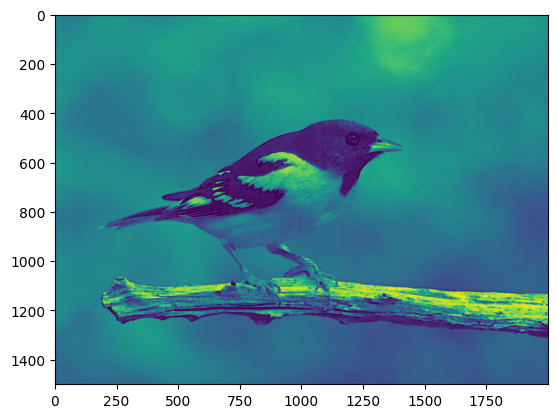

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='L').astype(np.uint8)

# performing minimum filter
## size = 5: convolution
## footprint: a boolean array of the same dimension of image.
## The pixels in the input image corresponding to the points to the
## footprint with true values are considered for filtering
## mode: padding (constant, reflect, nearest)
b = sn.minimum_filter(a, size=5, footprint=None, output=None,
                      mode='reflect', cval=0.0, origin=0)
iio.imsave('bird_min_filter.png', b)
# b is converted from an ndarray to an image
print(b)
plt.imshow(b)
plt.show()


2.8 Dò cạnh biên của ảnh

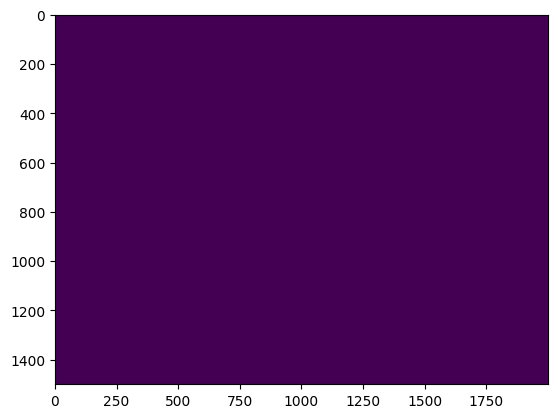

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='L')

b = filters.sobel(a).astype(np.uint8)

iio.imsave('bird_sobel_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()


Prewit filter

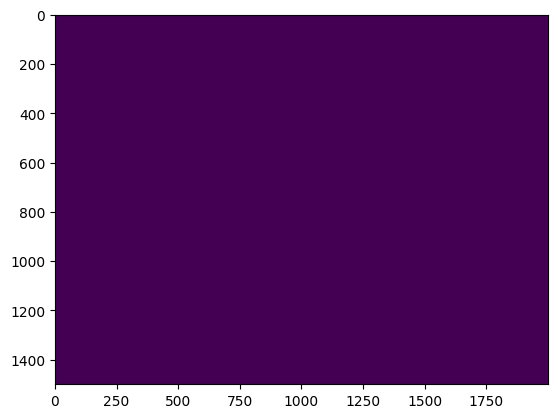

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='L')

b = filters.prewitt(a).astype(np.uint8)

iio.imsave('bird_prewitt_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()


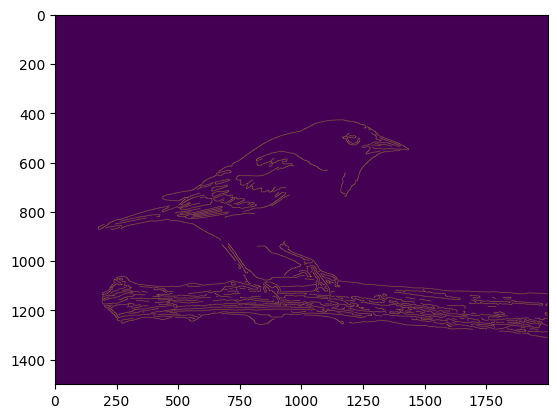

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import feature
import matplotlib.pylab as plt
import colorsys

# opening the image and converting it to grayscale
a = iio.imread('bird.png', mode='L')

b = feature.canny(a, sigma=3).astype(np.uint8)

iio.imsave('bird_canny_filter_edge_detection.png', b)
plt.imshow(b)
plt.show()


3.Bài Tập

1. Nạp một ảnh và lưu thành 3 ảnh với 3 màu khác nhau

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh
img = cv2.imread('bird.png')

# Kiểm tra xem ảnh có được đọc thành công không
if img is None:
    print("Error: Could not load image 'bird.png'. Please check the file path.")
else:
    # Tách các kênh màu
    b, g, r = cv2.split(img)

    # Tạo ảnh với từng kênh màu riêng biệt
    img_red = cv2.merge([np.zeros_like(b), np.zeros_like(g), r])
    img_green = cv2.merge([np.zeros_like(b), g, np.zeros_like(r)])
    img_blue = cv2.merge([b, np.zeros_like(g), np.zeros_like(r)])

    # Lưu ảnh
    cv2.imwrite('bird_red.png', img_red)
    cv2.imwrite('bird_green.png', img_green)
    cv2.imwrite('bird_blue.png', img_blue)

    print("Images saved successfully.")

Error: Could not load image 'bird.png'. Please check the file path.


2. Nạp một ảnh và hoán đổi giá trị các màu. Lưu các ảnh vào máy.

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh
img = cv2.imread('bird.png')

# Kiểm tra xem ảnh có được đọc thành công không
if img is None:
    print("Error: Could not load image 'bird.png'. Please check the file path.")
else:
    # Tách các kênh màu
    b, g, r = cv2.split(img)

    # Tạo ảnh với từng kênh màu riêng biệt
    img_red = cv2.merge([np.zeros_like(b), np.zeros_like(g), r])
    img_green = cv2.merge([np.zeros_like(b), g, np.zeros_like(r)])
    img_blue = cv2.merge([b, np.zeros_like(g), np.zeros_like(r)])

    # Lưu ảnh
    cv2.imwrite('bird_red.png', img_red)
    cv2.imwrite('bird_green.png', img_green)
    cv2.imwrite('bird_blue.png', img_blue)

    print("Images saved successfully.")

    # Hoán đổi kênh màu: R <-> B
    # Move this code inside the else block so r, g, and b are defined
    img_swap = cv2.merge([r, g, b])
    cv2.imwrite('bird_swap.png', img_swap)
    print("Swapped color image saved successfully.")

Error: Could not load image 'bird.png'. Please check the file path.


3. Chuyển thành hệ màu HSV và lưu 3 ảnh với 3 màu khác nhau.

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Check if the image was loaded successfully in previous cells
if img is None:
    print("Error: Image 'bird.png' was not loaded successfully in previous steps. Cannot perform color conversion.")
else:
    # Chuyển đổi không gian màu từ BGR sang HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Tách các kênh HSV
    h, s, v = cv2.split(hsv)

    # Hiển thị và lưu từng kênh HSV
    cv2.imwrite('bird_H.png', h)
    cv2.imwrite('bird_S.png', s)
    cv2.imwrite('bird_V.png', v)

    print("HSV channel images saved successfully.")

Error: Image 'bird.png' was not loaded successfully in previous steps. Cannot perform color conversion.


4. Chuyển sang hệ màu HSV. Lưu ảnh mới với kênh Hnew = 1/3 Hold, Vnew = 3/4 Vold.


In [8]:
# Check if the HSV channels were successfully created in the previous step
if 'h' in locals() and 's' in locals() and 'v' in locals():
    h_new = (h // 3).astype(np.uint8)
    v_new = (v * 0.75).astype(np.uint8)

    hsv_modified = cv2.merge([h_new, s, v_new])
    bgr_modified = cv2.cvtColor(hsv_modified, cv2.COLOR_HSV2BGR)
    cv2.imwrite('bird_modified.png', bgr_modified)

    print("Modified image saved successfully.")
else:
    print("Error: HSV channels (h, s, v) were not defined. Please ensure the image was loaded and converted successfully in previous steps.")

Error: HSV channels (h, s, v) were not defined. Please ensure the image was loaded and converted successfully in previous steps.
